Import Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Function performs Non-maximum supression

In [2]:
def nms(I_grad_mag, I_grad_edge):
    #  Non-maximum supression
    I_grad_mag_nms = np.copy(I_grad_mag)
    a_temp = [];
    for i in range(1, I_grad_mag.shape[0]-1):
        for j in range (1, I_grad_mag.shape[1]-1):
            
            ang_val = np.rint(np.abs(I_grad_edge[i,j])/(np.pi/4))
            if (ang_val not in a_temp):
                a_temp.append(ang_val)
                
            if(ang_val == 0 or ang_val == 4):
                candidate = np.array([I_grad_mag[i,j+1], I_grad_mag[i,j-1]])
            elif (ang_val == 1):
                candidate = np.array([I_grad_mag[i-1,j+1], I_grad_mag[i+1,j-1]])
            elif (ang_val == 2):
                candidate = np.array([I_grad_mag[i+1,j], I_grad_mag[i-1,j]])
            elif (ang_val == 3):
                candidate = np.array([I_grad_mag[i+1,j+1], I_grad_mag[i-1,j-1]])
            
            if(np.all(I_grad_mag[i][j]>candidate)):
                I_grad_mag_nms[i,j] = I_grad_mag[i,j]
            else:
                I_grad_mag_nms[i,j] = 0
    
    #print(a_temp)
    return I_grad_mag_nms

Main Canny Edge Detector

In [3]:
def cannyEdgeDetection(I, T):
    # Gaussian smoothing
    
    assert(np.shape(I.shape)[0] == 2)
    
    filter = np.array([[2, 4, 5, 4, 2],[4, 9, 12, 9, 4],[5, 12, 15, 12, 5],
                       [4, 9, 12, 9, 4],[2, 4, 5, 4, 2]])/159
    I_smooth = cv2.filter2D(I, -1,filter)
      
    
    # Apply Sobel operator
    filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    I_edge_x = cv2.filter2D(I_smooth, -1, filter)
    
    filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    I_edge_y = cv2.filter2D(I_smooth, -1, filter)
    
    # Compute gradient images
    I_edge_mag = np.sqrt(np.square(I_edge_x) + np.square(I_edge_y))
    I_edge_dir = np.arctan2(I_edge_y,I_edge_x)
    I_edge_mag[I_edge_mag>=1] = 1.0
        
    # Apply NMS
    I_edge_NMS = nms(I_edge_mag, I_edge_dir)
    
    # Prevent clipping
    I_edge = np.copy(I_edge_NMS)
            
    # Threshold
    I_edge[I_edge<=T] = 0
    I_edge[I_edge>T] = 1.0
    
    return I_edge_mag , I_edge_NMS, I_edge

Read image and perform Canny edge detection

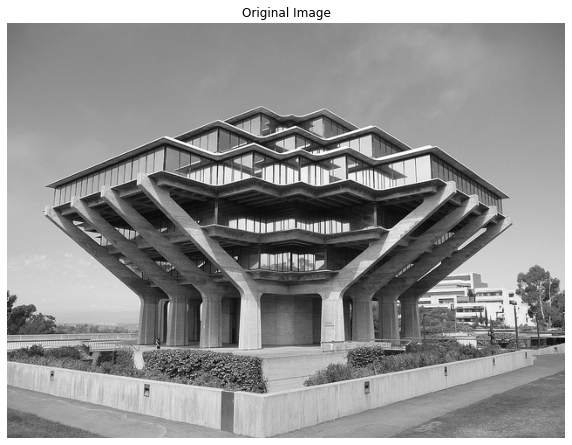

In [4]:
I = cv2.imread('/home/parth/work/UCSD/Fall 2021/ECE 253 Image Processing/Assignment 3/HW3_geisel.jpg',0)
#I = cv2.resize(I, (0,0), fx=0.25, fy=0.25) 
I = I/255

plt.figure(figsize=(10,10))
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [5]:
[I_edge_mag, I_edge_NMS, I_edge] = cannyEdgeDetection(I, 0.25)

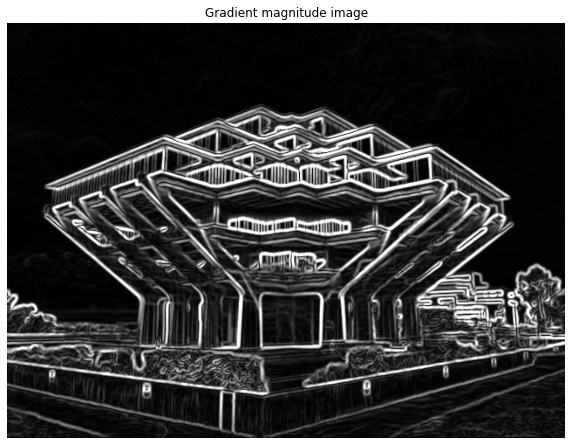

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(I_edge_mag ,cmap='gray')
plt.title('Gradient magnitude image')
plt.axis('off')
plt.show()

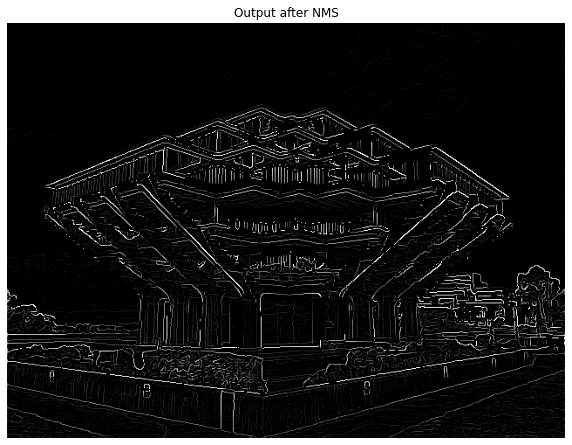

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(I_edge_NMS ,cmap='gray')
plt.title('Output after NMS')
plt.axis('off')
plt.show()

Output of canny edge detector with a threshold 0.25

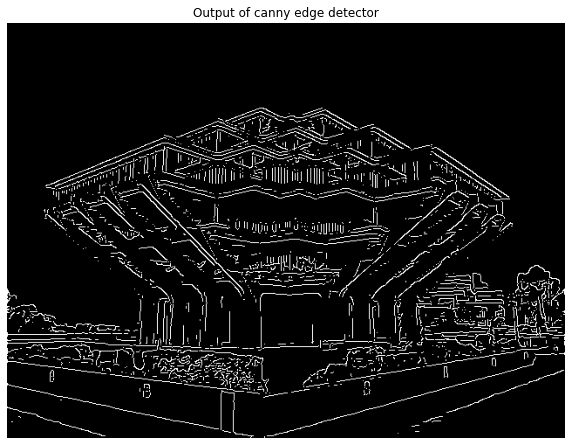

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(I_edge, cmap='gray')
plt.title('Output of canny edge detector')
plt.axis('off')
plt.show()